# SAR example
Let's use EOReader with SAR data

<div class="alert alert-warning">
  
<strong>Warning:</strong> 
   <li> We do not provide COSMO-SkyMed data.
   <li> You will need <strong>matplotlib</strong> to complete this tutorial
</div>

In [1]:
import os

# First of all, we need some VHR data, let's use some COSMO-SkyMed data
path = os.path.join("/home", "data", "DATA", "PRODS", "COSMO", "1st_GEN", "1001512-735097")

In [2]:
# Create logger
import logging

logger = logging.getLogger("eoreader")
logger.setLevel(logging.INFO)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)

# create formatter
formatter = logging.Formatter('%(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

In [3]:
from eoreader.reader import Reader

# Create the reader
eoreader = Reader()

In [4]:
# Open your product
prod = eoreader.open(path, remove_tmp=True)
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")

# Please be aware that EOReader will orthorectify your SAR data with SNAP
# Be sure to have your GPT executable in your path

Acquisition datetime: 2020-10-08 22:40:18.446381
Condensed name: 20201008T224018_CSK_HI_DGM


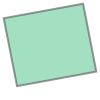

In [5]:
# Open here some more interesting geographical data: extent
extent = prod.extent
extent.geometry.to_crs("EPSG:4326").iat[0]  # Display

In [ ]:
# Open here some more interesting geographical data: footprint
footprint = prod.footprint
footprint.geometry.to_crs("EPSG:4326").iat[0]  # Display

Executing processing graph
....10%....20%....30%....40%....50%....60%....70%

For SAR data, the footprint needs the orthorectified data !
For that, SNAP uses its own DEM, but you can change it when positionning the `EOREADER_SNAP_DEM_NAME` environment variable. 
Available DEMs are:
- `ACE2_5Min` 
- `ACE30`
- `ASTER 1sec GDEM`
- `Copernicus 30m Global DEM`(buggy for now, do not use it)
- `Copernicus 90m Global DEM`(buggy for now, do not use it)
- `GETASSE30` (by default)
- `SRTM 1Sec HGT`
- `SRTM 3Sec`
- `External DEM`

<div class="alert alert-warning">
  
<strong>Warning:</strong> 
   If `External DEM` is set, you must specify the DEM you want by positioning the `EOREADER_DEM_PATH` to a DEM that can be read by SNAP.
</div>
    


In [ ]:
from eoreader.bands import *
from eoreader.env_vars import DEM_PATH

# Set the DEM
os.environ[DEM_PATH] = os.path.join("/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL", "MERIT_Hydrologically_Adjusted_Elevations", "MERIT_DEM.vrt")

# Select the bands you want to load
bands = [VV, HH, VV_DSPK, HH_DSPK, HILLSHADE, SLOPE]

# Be sure they exist for COSMO-SkyMed sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands)) # This product does not have VV band and HILLSHADE band cannot be computed from SAR band

In [ ]:
# Load those bands as a dict of xarray.DataArray, with a 20m resolution
band_dict = prod.load(ok_bands, resolution=20.)
band_dict[HH]

In [ ]:
# Plot a subsampled version
band_dict[SLOPE][:, ::10, ::10].plot()

In [ ]:
# You can also stack those bands
stack = prod.stack(ok_bands)
stack

In [ ]:
# Error in plotting with a list
if "long_name" in stack.attrs:
    stack.attrs.pop("long_name")

# Plot a subsampled version
import matplotlib.pyplot as plt
nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(3*nrows, 6*nrows), subplot_kw={"box_aspect": 1})
for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])